# HR Analytics - Job Change of Data Scientists

A company wants to hire data scientists among people who successfully pass the courses they conduct. There is a large number of people who signup for their training and they want to know which of these candidates want to work for the company or are seeking employment opportunities. Their objective is to reduce the cost and time spent on the recruitment process by categorizing candidates.

Dataset Description:
+ enrollee_id : Unique ID for candidate
+ city: City code
+ city_ development _index : Developement index of the city (scaled)
+ gender: Gender of candidate
+ relevent_experience: Relevant experience of candidate
+ enrolled_university: Type of University course enrolled if any
+ education_level: Education level of candidate
+ major_discipline :Education major discipline of candidate
+ experience: Candidate total experience in years
+ company_size: No of employees in current employer's company
+ company_type : Type of current employer
+ last_new_job: Difference in years between previous job and current job
+ training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

Goal: Predict whether or not a candidate would like to work for the company and interpret the features in the model that affect candidate decision

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('aug_train.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
data.shape

(19158, 14)

## Data Preprocessing

First we will drop enrollee_id and gender from the dataset. The enrollee ID has no predictive power in determining whether or not a candidate is interested in working for the company. Gender will not be included in the model as we do not want to introduce potential gender bias in our analysis.

In [4]:
data = data.drop(['enrollee_id', 'gender'], axis=1)

**Missing Values**

In [5]:
data.isna().sum()

city                         0
city_development_index       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Assume that anyone with unspecified values in enrolled_university are no_enrollment.

In [6]:
data['enrolled_university'] = data['enrolled_university'].fillna('no_enrollment')

Let's drop anyone who did not specify what their level of education was.

In [7]:
data.dropna(subset = ['education_level'], inplace=True)

Anyone with highschool or primary education does not have a major discipline. We will fill missing values with 'N/A'

In [8]:
data.loc[(data['education_level'] == 'High School')|(data['education_level'] == 'Primary School'), 'major_discipline'] = 'N/A'

Any remaining missing values in major_discipline we will fill with 'Other'

In [9]:
data['major_discipline'] = data['major_discipline'].fillna('Other')

Let's drop NA values in experience since there are only 55 missing values.

In [10]:
data.dropna(subset = ['experience'], inplace=True)

Anyone who did not specify last_new_job we can assume 'never'

In [11]:
data['last_new_job'] = data['last_new_job'].fillna('never')

Due to the number of missing values in company_size and company_type, we will drop the columns.

In [12]:
data = data.drop(['company_size', 'company_type'], axis=1)

In [13]:
data.isna().sum()

city                      0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [14]:
data.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0
1,city_40,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0
2,city_21,0.624,No relevent experience,Full time course,Graduate,STEM,5,never,83,0.0
3,city_115,0.789,No relevent experience,no_enrollment,Graduate,Business Degree,<1,never,52,1.0
4,city_162,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0


In [15]:
data.groupby('relevent_experience').agg({'city_development_index':'mean', 
                                         'training_hours': 'mean',
                                         'target': 'sum'})

,city_development_index,training_hours,target
relevent_experience,,,
Has relevent experience,0.834001,65.793516,2896.0
No relevent experience,0.817899,63.864563,1757.0


In [16]:
pd.crosstab(data['relevent_experience'], data['education_level'])

education_level,Graduate,High School,Masters,Phd,Primary School
relevent_experience,,,,,
Has relevent experience,8875,780,3564,257,65
No relevent experience,2691,1233,782,154,242


<AxesSubplot:xlabel='target'>

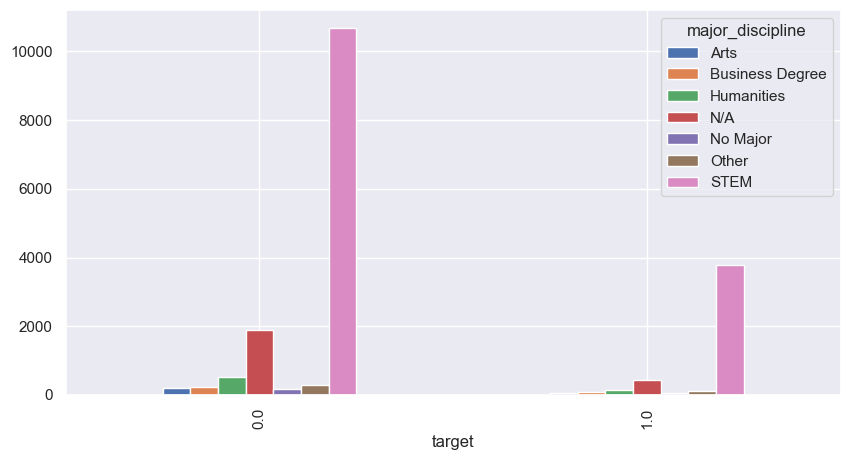

In [47]:
pd.crosstab(data['target'], data['major_discipline']).plot(kind='bar')

Text(0.5, 1.0, 'Count of Target Grouped by Relevant Experience')

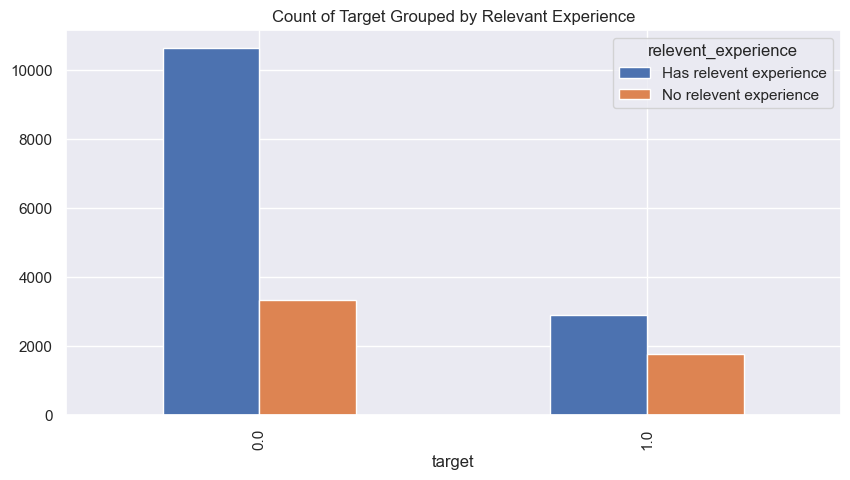

In [49]:
pd.crosstab(data['target'], data['relevent_experience']).plot(kind='bar')
plt.title('Count of Target Grouped by Relevant Experience')

<AxesSubplot:xlabel='experience'>

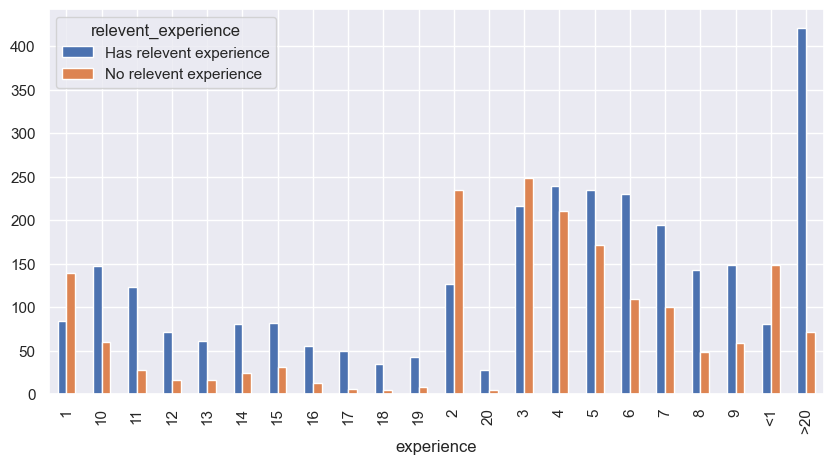

In [52]:
interested = data[data['target'] == 1].sort_values(by='experience')
pd.crosstab(interested['experience'], interested['relevent_experience']).plot(kind='bar')

## Exploratory Analysis



Pie chart (and/or) bar chart of target to see the class distribution - should be inbalanced.

Text(0.5, 1.0, 'Pie chart of Class Distribution')

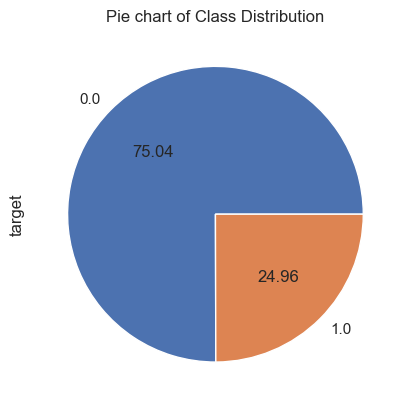

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")
data['target'].value_counts().plot.pie(autopct="%.2f")
plt.title('Pie chart of Class Distribution')

Box plot of city_development_index grouped by target

<AxesSubplot:title={'center':'city_development_index'}, xlabel='target'>

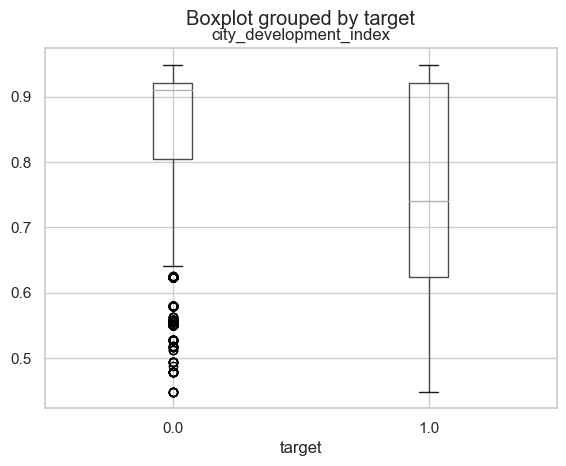

In [28]:
data.boxplot('city_development_index', by='target')

Counts with Target at center -> then Education level -> then major Discipline

In [38]:
count = pd.DataFrame(data[['target', 'education_level']].value_counts().rename('counts'))

In [39]:
count = count.reset_index()
count

,target,education_level,counts
0,0.0,Graduate,8336
1,0.0,Masters,3415
2,1.0,Graduate,3230
3,0.0,High School,1619
4,1.0,Masters,931
5,1.0,High School,394
6,0.0,Phd,353
7,0.0,Primary School,267
8,1.0,Phd,58
9,1.0,Primary School,40


Text(0.5, 0, 'Education Level')

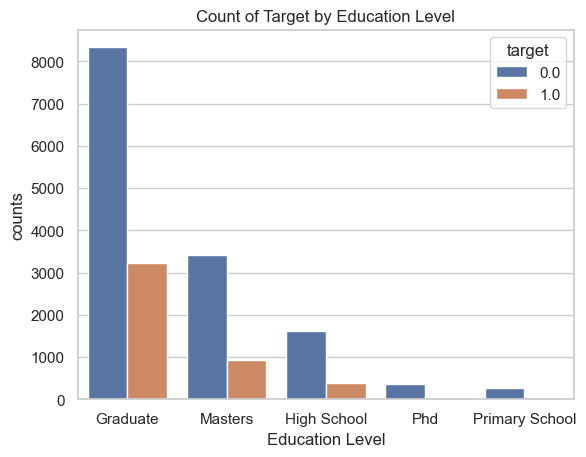

In [42]:
sns.barplot(data=count, x='education_level', y='counts', hue='target')
sns.set(rc={'figure.figsize':(10,5)})
plt.title('Count of Target by Education Level')
plt.xlabel('Education Level')

In [44]:
count2 = pd.DataFrame(data[['target', 'education_discipline']].value_counts().rename('counts'))
count2 = count2.reset_index()
count2

KeyError: "['education_discipline'] not in index"

## Model


Encode ordinal data

In [54]:
data['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '6', '9', '3', '8', '20'],
      dtype=object)

In [55]:
data['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [56]:
data['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [57]:
data['experience'] = data['experience'].map({'<1': 0,
                                              '1' : 1,
                                              '2' : 2,
                                              '3' : 3,
                                              '4' : 4,
                                              '5' : 5,
                                              '6' : 6,
                                              '7' : 7,
                                              '8' : 8,
                                              '9' : 9,
                                              '10' : 10,
                                              '11' : 11,
                                              '12' : 12,
                                              '13' : 13,
                                              '14' : 14,
                                              '15' : 15,
                                              '16' : 16,
                                              '17' : 19,
                                              '18' : 18,
                                              '19' : 19,
                                              '20' : 20,
                                              '>20' : 21})

In [58]:
data['education_level'] = data['education_level'].map({'Primary School': 0,
                                                       'High School': 1,
                                                       'Graduate': 2,
                                                       'Masters': 3,
                                                       'Phd': 4})

In [59]:
data['education_level'].unique()

array([2, 3, 1, 4, 0], dtype=int64)

In [60]:
data['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [61]:
data['last_new_job'] = data['last_new_job'].map({'never': 0,
                                                 '1' : 1,
                                                 '2' : 2,
                                                 '3' : 3,
                                                 '4' : 4,
                                                 '>4': 5})

In [62]:
data['last_new_job'].unique()

array([1, 5, 0, 4, 3, 2], dtype=int64)

In [63]:
data['relevent_experience'] = data['relevent_experience'].map({'Has relevent experience': 1,
                                                               'No relevent experience': 0})

In [64]:
data['relevent_experience'].unique()

array([1, 0], dtype=int64)

In [65]:
data.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,city_103,0.920,1,no_enrollment,2,STEM,21,1,36,1.0
1,city_40,0.776,0,no_enrollment,2,STEM,15,5,47,0.0
2,city_21,0.624,0,Full time course,2,STEM,5,0,83,0.0
3,city_115,0.789,0,no_enrollment,2,Business Degree,0,0,52,1.0
4,city_162,0.767,1,no_enrollment,3,STEM,21,4,8,0.0


In [66]:
from sklearn.preprocessing import LabelEncoder

data['city'] = LabelEncoder().fit_transform(data['city'])
data['enrolled_university'] = LabelEncoder().fit_transform(data['city'])
data['major_discipline'] = LabelEncoder().fit_transform(data['major_discipline'])

In [67]:
data.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,5,0.920,1,5,2,6,21,1,36,1.0
1,77,0.776,0,77,2,6,15,5,47,0.0
2,64,0.624,0,64,2,6,5,0,83,0.0
3,14,0.789,0,14,2,1,0,0,52,1.0
4,50,0.767,1,50,3,6,21,4,8,0.0


In [68]:
data.shape

(18643, 10)

In [69]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [70]:
print(X_train.shape[0])
print(X_test.shape[0])

14914
3729


In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [113]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_curve, roc_auc_score

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80      2423
         1.0       0.64      0.47      0.54      1306

    accuracy                           0.72      3729
   macro avg       0.69      0.66      0.67      3729
weighted avg       0.71      0.72      0.71      3729



In [88]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [89]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [114]:
rf = RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf = 4, max_features='auto',
                            bootstrap=True, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      2686
         1.0       0.57      0.52      0.54      1043

    accuracy                           0.75      3729
   macro avg       0.69      0.68      0.69      3729
weighted avg       0.75      0.75      0.75      3729



In [115]:
confusion_matrix(y_pred, y_test)

array([[2268,  418],
       [ 500,  543]], dtype=int64)

In [111]:
lg = LogisticRegression(max_iter=1000, class_weight='balanced')
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80      2423
         1.0       0.64      0.47      0.54      1306

    accuracy                           0.72      3729
   macro avg       0.69      0.66      0.67      3729
weighted avg       0.71      0.72      0.71      3729



In [112]:
confusion_matrix(y_pred, y_test)

array([[2076,  347],
       [ 692,  614]], dtype=int64)

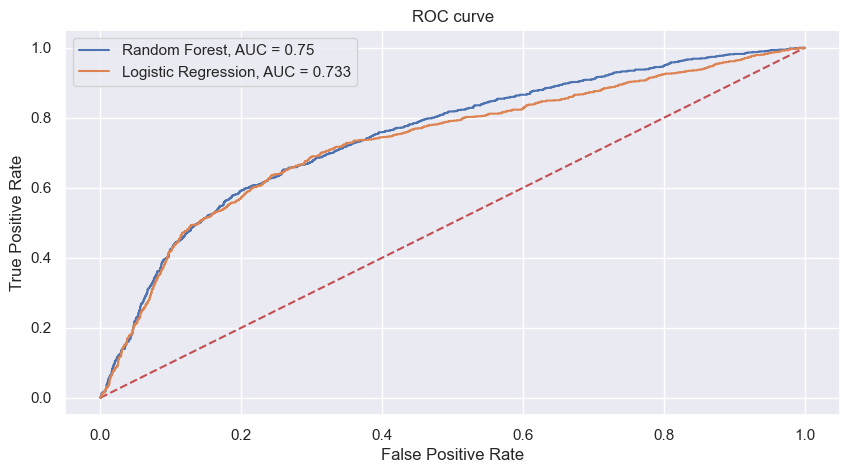

In [117]:
plt.plot([0, 1], [0, 1],'r--')

# Random forest
prob_rf = rf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, prob_rf[:,1])
aucrf = roc_auc_score(y_test, prob_rf[:,1])
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucrf,3))}')
# Logistic regression
prob_log = lg.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, prob_log[:,1])
auclog = roc_auc_score(y_test, prob_log[:,1])
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclog,3))}')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()